In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [15]:
def Cargar_Archivos_Laurdan(archivo):
    # Nombre del archivo a cargar
    nombre_archivo = archivo
    
    # Lista de nombres de columnas
    columnas = [
        "Temperature",
        "Sample",
        "Iteration",
        "Ratio",
        "GPolarization",
        "I1",
        "I2",
        "RatioStdError",
        "GPolarizationStdError",
        "I1StdError",
        "I2StdError",
        "RealTime",
        "RealTemperature"
    ]
    
    # Cargar el archivo CSV
    LAURDAN = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows=2, decimal=',')
    
    # Devolver el DataFrame cargado
    return LAURDAN

In [16]:
LAURDAN = Cargar_Archivos_Laurdan('Lau.csv')
LAURDAN
LAURDAN7 = Cargar_Archivos_Laurdan('Lau7STX.csv')
LAURDAN7
LAURDAN15= Cargar_Archivos_Laurdan('Lau15STX.csv')
LAURDAN15
LAURDAN22= Cargar_Archivos_Laurdan('Lau22STX.csv')
LAURDAN22


,Temperature,Sample,Iteration,Ratio,GPolarization,I1,I2,RatioStdError,GPolarizationStdError,I1StdError,I2StdError,RealTime,RealTemperature
0,30.00,Blank,1,4.4415263,0.63245606,93215.200,20987.200,0.33042041,0.053434488,5044.9480,1071.2203,20133.058,29.993300
1,30.00,Sample2,1,3.9958708,0.59966939,86707.200,21699.200,0.12111369,0.027452110,2547.1120,161.98765,20138.262,30.013300
2,31.00,Reference,1,3.7274480,0.57693876,85087.200,22827.200,0.13292628,0.023057779,2071.5817,594.81612,20303.316,30.996600
3,31.00,Blank,1,3.8012028,0.58343772,90511.200,23811.200,0.36953607,0.039351489,3234.9593,2152.7021,20308.629,30.990000
4,31.00,Sample2,1,3.6760894,0.57229218,81459.200,22159.200,0.12313547,0.014849083,1153.6377,672.64651,20313.771,30.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,54.00,Blank,1,1.1805580,0.082803562,70719.200,59903.200,0.0095742819,0.0039405446,309.85301,408.81183,23272.001,54.010000
73,54.00,Sample2,1,1.1780060,0.081728897,62207.200,52807.200,0.0083159356,0.0037184492,391.05782,169.60608,23277.166,54.010000
74,55.00,Reference,1,1.1736200,0.079875971,73275.200,62435.200,0.010531824,0.0046263820,532.80641,328.34670,23394.384,55.006600
75,55.00,Blank,1,1.1476232,0.068737945,69375.200,60451.200,0.0084700311,0.0035673333,244.80015,391.86392,23399.473,55.003300


In [17]:
def calcular_promedio_y_desviacion(df):
    temperatures = df['Temperature'].unique()
    data_promedio = []
    data_des = []
    df['GPolarization'] = pd.to_numeric(df['GPolarization'], errors='coerce')

    for temp in temperatures:
        temp_data = df[df['Temperature'] == temp]['GPolarization']
        temp_promedios = [temp_data[i:i+4].mean() for i in range(0, len(temp_data), 4)]
        temp_des = [temp_data[i:i+4].std() for i in range(0, len(temp_data), 4)]  # No necesitas dividir por 2 aquí
        data_promedio.extend(temp_promedios)
        data_des.extend(temp_des)

    temperatures_promedio = sorted(set(df['Temperature']))

    return data_promedio, data_des, temperatures_promedio

In [18]:
def calcular_promedio_y_desviacion3(df):
    temperatures = df['Temperature'].unique()
    data_promedio = []
    data_des = []
    df['GPolarization'] = pd.to_numeric(df['GPolarization'], errors='coerce')

    for temp in temperatures:
        temp_data = df[df['Temperature'] == temp]['GPolarization']
        temp_promedios = [temp_data[i:i+3].mean() for i in range(0, len(temp_data), 3)]
        temp_des = [temp_data[i:i+3].std() for i in range(0, len(temp_data), 3)]  # No necesitas dividir por 2 aquí
        data_promedio.extend(temp_promedios)
        data_des.extend(temp_des)

    temperatures_promedio = sorted(set(df['Temperature']))

    return data_promedio, data_des, temperatures_promedio

In [19]:
Promedio_Laurdan, Desviacion_Laurdan,temperatures_promedio1 = calcular_promedio_y_desviacion3(LAURDAN)
Promedio_Laurdan7, Desviacion_Laurdan7,temperatures_promedio1 = calcular_promedio_y_desviacion3(LAURDAN7)
Promedio_Laurdan15, Desviacion_Laurdan15,temperatures_promedio1 = calcular_promedio_y_desviacion(LAURDAN15)
Promedio_Laurdan22, Desviacion_Laurdan22,temperatures_promedio1 = calcular_promedio_y_desviacion3(LAURDAN22)


In [20]:
T_P = temperatures_promedio1
def graficar_promedio_y_desviacion(T_P, D_P, DES, D_P7, DES_7,D_P15, DES_15, D_P22, DES_22):
    plt.figure(figsize=(10, 6))  
    
    plt.errorbar(T_P, D_P, yerr=DES, fmt='o', capsize=5, color= 'blue')
    plt.errorbar(T_P, D_P7, yerr=DES_7, fmt='o', capsize=5, color='orange')
    plt.errorbar(T_P, D_P15, yerr=DES_15, fmt='o', capsize=5, color ='green')
    plt.errorbar(T_P, D_P22, yerr=DES_22, fmt='o', capsize=5, color= 'red')
        
    plt.plot(T_P, D_P, marker='o', label='INICIAL', color= 'blue')
    plt.plot(T_P, D_P7, marker='o', label='STX (7,5%)',color= 'orange')
    plt.plot(T_P, D_P15, marker='o', label='STX (15%)',color= 'green')
    plt.plot(T_P, D_P22, marker='o', label='STX (22,5%)',color= 'red')

    
    
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Anisotropía de Fluorescencia')
    plt.title('DPPC- DPPG LAURDAN')
    plt.xticks(range(0, 35, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

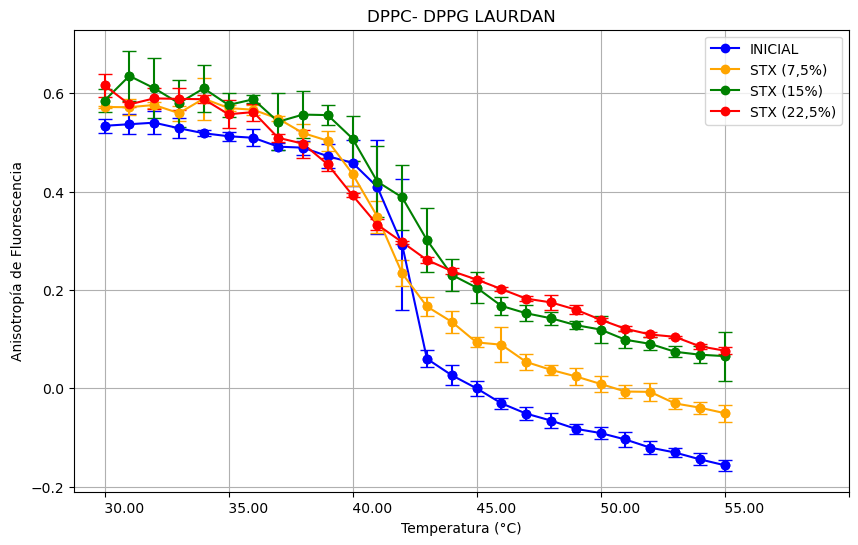

In [21]:
graficar_promedio_y_desviacion(temperatures_promedio1,Promedio_Laurdan, Desviacion_Laurdan, Promedio_Laurdan7, Desviacion_Laurdan7, Promedio_Laurdan15, Desviacion_Laurdan15, Promedio_Laurdan22, Desviacion_Laurdan22)

In [22]:
def graficar_derivadas(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x,y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    plt.plot(T[:-1], der_promedio, label='INICIAL')
    plt.plot(T[:-1], der_p, label='STX(7,5%)')
    plt.plot(T[:-1], der_p15, label='STX(15%)')
    plt.plot(T[:-1], der_p22, label='STX(22,5%)')


    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Derivada de Anisotropía')
    plt.title('DPPC- DPPG LAURDAN')
    plt.xticks(range(30, 60, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()
    

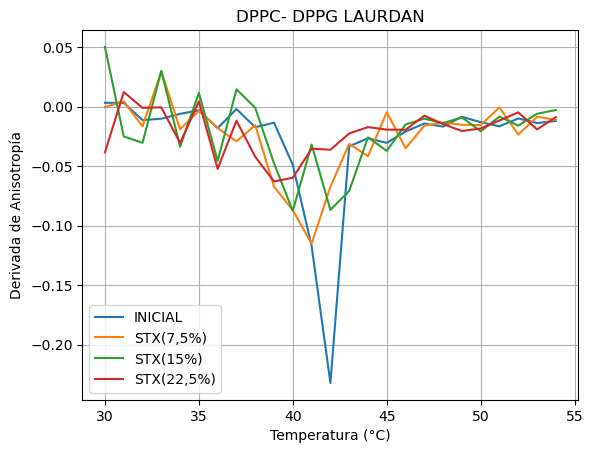

In [24]:
graficar_derivadas(temperatures_promedio1, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22)

In [26]:
X = np.array(temperatures_promedio1, dtype=np.float64) 
Y = np.array(Promedio_Laurdan, dtype=np.float64)


In [27]:
def encontrar_temperatura_minima(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x, y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    T_min = np.argmin(der_promedio)
    T_min = T[T_min]

    T_min7l = np.argmin(der_p)
    T_min7l = T[T_min7l]
    
    T_min15l = np.argmin(der_p15)
    T_min15l = T[T_min15l]
    
    T_min22l = np.argmin(der_p22)
    T_min22l = T[T_min22l]

    return T_min, T_min7l, T_min15l, T_min22l

In [30]:
T_min, T_min7l, T_min15l,T_min22l  = encontrar_temperatura_minima(temperatures_promedio1, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22)

In [31]:
T_min, T_min7l, T_min15l, T_min22l

(42.0, 41.0, 40.0, 39.0)

In [32]:
def Cargar_Archivos_DPH(archivo):
    # Nombre del archivo a cargar
    nombre_archivo = archivo
    
    # Lista de nombres de columnas
    columnas = [
    "Temperature",
    "Sample",
    "Iteration",
    "GPolarization",
    "Anisotropy",
    "TotalIntensity",
    "I_VV",
    "I_VH",
    "I_HV",
    "I_HH",
    "GFactor",
    "PolarizationStdError",
    "AnisotropyStdError",
    "TotalIntensityStdError",
    "I_VVStdError",
    "I_VHStdError",
    "I_HVStdError",
    "I_HHStdError",
    "GFactorStdError",
    "RealTime",
    "RealTemperature"]
    
    # Cargar el archivo CSV
    DPH = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows=2, decimal=',')
    
    # Devolver el DataFrame cargado
    return DPH

In [37]:
DPH = Cargar_Archivos_DPH('DPH.csv')
DPH
DPH7 = Cargar_Archivos_DPH('DPH7STX.csv')
DPH7
DPH15 = Cargar_Archivos_DPH('DPH15STX.csv')
DPH15
DPH22 = Cargar_Archivos_DPH('DPH22STX.csv')
DPH22

,Temperature,Sample,Iteration,GPolarization,Anisotropy,TotalIntensity,I_VV,I_VH,I_HV,I_HH,...,PolarizationStdError,AnisotropyStdError,TotalIntensityStdError,I_VVStdError,I_VHStdError,I_HVStdError,I_HHStdError,GFactorStdError,RealTime,RealTemperature
0,30.00,Reference,1,0.28135482,0.20698164,25304.193,11926.400,8103.2000,11146.400,13503.200,...,0.072460416,0.055464936,2573.8314,199.46595,142.29234,1385.9646,1957.9440,0.15767323,14647.596,29.956600
1,30.00,Blank,1,0.33788794,0.25384953,23229.570,11674.400,6999.2000,11146.400,13503.200,...,0.091753077,0.071037247,2558.1675,941.82895,536.86332,1385.9646,1957.9440,0.15767323,14650.174,29.950000
2,30.00,Sample2,1,0.31034873,0.23077247,26434.493,12878.400,8211.2000,11146.400,13503.200,...,0.080203806,0.062048511,2819.1566,611.17882,564.73553,1385.9646,1957.9440,0.15767323,14652.769,29.963300
3,31.00,Sample,1,0.28822940,0.21257653,21181.725,10062.400,6735.2000,11146.400,13503.200,...,0.075502117,0.057821538,2183.9355,350.45114,223.14519,1385.9646,1957.9440,0.15767323,14760.767,31.010000
4,31.00,Reference,1,0.28634168,0.21103738,23902.541,11330.400,7615.2000,11146.400,13503.200,...,0.072729426,0.055824500,2431.5137,228.34282,184.98769,1385.9646,1957.9440,0.15767323,14763.346,31.006600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,54.00,Sample2,1,0.082897381,0.056835424,45316.083,16822.400,17259.200,11146.400,13503.200,...,0.098409436,0.067623719,5735.4863,1189.1689,825.97821,1385.9646,1957.9440,0.15767323,17377.854,54.010000
99,55.00,Sample,1,0.12566508,0.087439411,19340.888,7574.4000,7127.2000,11146.400,13503.200,...,0.091457666,0.063998636,2309.9336,458.08490,165.36021,1385.9646,1957.9440,0.15767323,17482.798,55.006600
100,55.00,Reference,1,0.052836496,0.035855829,22456.787,8022.4000,8743.2000,11146.400,13503.200,...,0.090932405,0.061780379,2764.7700,73.321211,116.15316,1385.9646,1957.9440,0.15767323,17485.385,55.010000
101,55.00,Blank,1,0.055061112,0.037393721,17234.291,6174.4000,6699.2000,11146.400,13503.200,...,0.090685548,0.061665688,2117.8372,50.173034,85.166504,1385.9646,1957.9440,0.15767323,17487.883,55.010000


In [38]:
Promedio_DPH, Desviacion_DPH,temperatures_promedio = calcular_promedio_y_desviacion(DPH)
Promedio_DPH7, Desviacion_DPH7,temperatures_promedio = calcular_promedio_y_desviacion(DPH7)
Promedio_DPH15, Desviacion_DPH15,temperatures_promedio = calcular_promedio_y_desviacion(DPH15)
Promedio_DPH22, Desviacion_DPH22,temperatures_promedio = calcular_promedio_y_desviacion(DPH22)

In [39]:
def graficar_promedio_y_desviacion_DPH(T_P, D_P, DES, D_P7, DES_7,D_P15, DES_15, D_P22, DES_22):
    plt.figure(figsize=(10, 6))  
    
    plt.errorbar(T_P, D_P, yerr=DES, fmt='o', capsize=5, color='blue')
    plt.errorbar(T_P, D_P7, yerr=DES_7, fmt='o', capsize=5, color='orange')
    plt.errorbar(T_P, D_P15, yerr=DES_15, fmt='o', capsize=5, color='green')
    plt.errorbar(T_P, D_P22, yerr=DES_22, fmt='o', capsize=5, color='red')
        
    plt.plot(T_P, D_P, marker='o', label='INICIAL', color='blue')
    plt.plot(T_P, D_P7, marker='o', label='STX (7,5%)', color= 'orange')
    plt.plot(T_P, D_P15, marker='o', label='STX (15%)', color='green')
    plt.plot(T_P, D_P22, marker='o', label='STX (22,5%)',color = 'red')

    
    
    plt.xlabel('Temperatura')
    plt.ylabel('Anisotropía de Fluoresencia')
    plt.title('DPPC - DPPG DPH')
    plt.xticks(range(0, 35, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

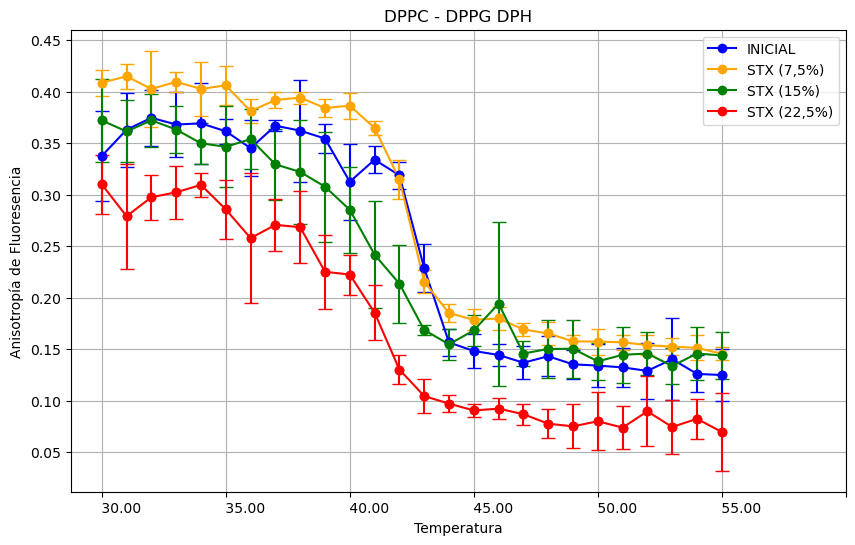

In [40]:
graficar_promedio_y_desviacion_DPH(temperatures_promedio1,Promedio_DPH, Desviacion_DPH, Promedio_DPH7, Desviacion_DPH7,Promedio_DPH15, Desviacion_DPH15,Promedio_DPH22, Desviacion_DPH22)

In [41]:
def graficar_derivadas(temperatures_promedio, Promedio_DPH, Promedio_DPH7, Promedio_DPH15,Promedio_DPH22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x,y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_DPH)
    der_p = derivada(T, Promedio_DPH7)
    der_p15 = derivada(T, Promedio_DPH15)
    der_p22 = derivada(T, Promedio_DPH22)

    
    plt.plot(T[:-1], der_promedio, label='INICIAL')
    plt.plot(T[:-1], der_p, label='STX(7,5%)')
    plt.plot(T[:-1], der_p15, label='STX(15%)')
    plt.plot(T[:-1], der_p22, label='STX(22,5%)')


    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Derivada de Anisotropía')
    plt.title('DPPC- DPPG DPH')
    plt.xticks(range(30, 60, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

In [42]:
def encontrar_temperatura_minimac(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x, y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-12):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    T_min = np.argmin(der_promedio)
    T_min = T[T_min]

    T_min7l = np.argmin(der_p)
    T_min7l = T[T_min7l]
    
    T_min15l = np.argmin(der_p15)
    T_min15l = T[T_min15l]
    
    T_min22l = np.argmin(der_p22)
    T_min22l = T[T_min22l]

    return T_min, T_min7l, T_min15l, T_min22l

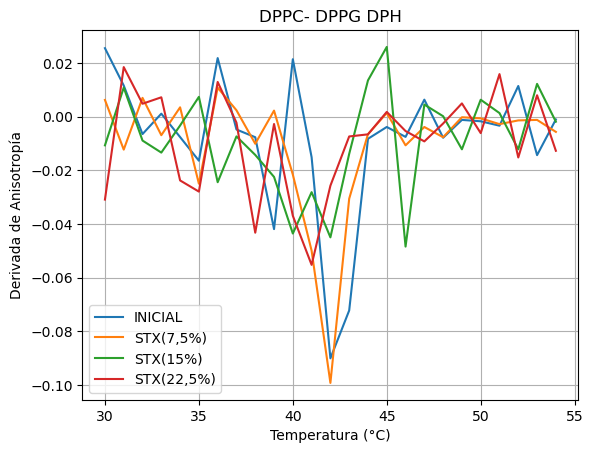

In [43]:
graficar_derivadas(temperatures_promedio, Promedio_DPH, Promedio_DPH7,Promedio_DPH15,Promedio_DPH22)

In [44]:
T_min, T_min7l, T_m15, T_m22 = encontrar_temperatura_minimac(temperatures_promedio, Promedio_DPH, Promedio_DPH7,Promedio_DPH15,Promedio_DPH22 )

In [45]:
T_min, T_min7l,T_m15, T_m22

(42.0, 42.0, 42.0, 41.0)

## Datos para colesterol

In [46]:
def Cargar_Archivos_Laurdan(archivo):
    # Nombre del archivo a cargar
    nombre_archivo = archivo
    
    # Lista de nombres de columnas
    columnas = [
        "Temperature",
        "Sample",
        "Iteration",
        "Ratio",
        "GPolarization",
        "I1",
        "I2",
        "RatioStdError",
        "GPolarizationStdError",
        "I1StdError",
        "I2StdError",
        "RealTime",
        "RealTemperature"
    ]
    
    # Cargar el archivo CSV
    LAURDAN = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows=2, decimal=',')
    
    # Devolver el DataFrame cargado
    return LAURDAN

In [47]:
LAUC = Cargar_Archivos_Laurdan('Lau.csv')
LAUC
LAUC7 = Cargar_Archivos_Laurdan('Lauc7.csv')
LAUC7
LAUC15= Cargar_Archivos_Laurdan('Lauc15.csv')
LAUC15
LAUC22= Cargar_Archivos_Laurdan('Lauc22.csv')
LAUC22

,Temperature,Sample,Iteration,Ratio,GPolarization,I1,I2,RatioStdError,GPolarizationStdError,I1StdError,I2StdError,RealTime,RealTemperature
0,30.00,Reference,1,3.9522340,0.59614186,274503.20,69455.200,0.074538919,0.014638206,4260.2379,744.28310,9008.4487,30.000000
1,30.00,Blank,1,3.8662551,0.58900634,279063.20,72179.200,0.066284925,0.0073186502,1901.7489,1135.5148,9013.7795,30.003300
2,30.00,Sample2,1,3.8107684,0.58426600,293243.20,76951.200,0.12320752,0.014707725,4133.6860,2239.0161,9018.9648,29.970000
3,31.00,Sample,1,4.1702336,0.61317028,303039.20,72667.200,0.073823226,0.014884091,4728.3371,607.63147,9178.8742,30.996600
4,31.00,Reference,1,4.0661397,0.60522210,281471.20,69223.200,0.045099060,0.0058362238,1623.5714,655.78452,9184.0839,30.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,54.00,Sample2,1,1.4656489,0.18885451,179951.20,122779.20,0.0093780206,0.0033644232,848.13102,531.33626,12283.791,54.003300
99,55.00,Sample,1,1.4662892,0.18906509,182927.20,124755.20,0.0080814208,0.0027909738,668.72881,514.56303,12401.687,55.003300
100,55.00,Reference,1,1.4434322,0.18147925,169983.20,117763.20,0.0075049647,0.0025005300,492.80152,508.27814,12406.859,55.006600
101,55.00,Blank,1,1.4012230,0.16709109,191019.20,136323.20,0.0088064775,0.0032439495,859.99897,597.80339,12412.090,55.006600


In [48]:
Promedio_Lauc, Desviacion_Lauc,temperatures_promedio = calcular_promedio_y_desviacion(LAUC)
Promedio_Lauc7, Desviacion_Lauc7,temperatures_promedio = calcular_promedio_y_desviacion(LAUC7)
Promedio_Lauc15, Desviacion_Lauc15,temperatures_promedio = calcular_promedio_y_desviacion(LAUC15)
Promedio_Lauc22, Desviacion_Lauc22,temperatures_promedio = calcular_promedio_y_desviacion(LAUC22)

In [50]:
def graficar_promedio_y_desviacion(T_P, D_P, DES, D_P7, DES_7,D_P15, DES_15, D_P22, DES_22):
    plt.figure(figsize=(10, 6))  
    
    plt.errorbar(T_P, D_P, yerr=DES, fmt='o', capsize=5, color= 'blue')
    plt.errorbar(T_P, D_P7, yerr=DES_7, fmt='o', capsize=5, color='orange')
    plt.errorbar(T_P, D_P15, yerr=DES_15, fmt='o', capsize=5, color ='green')
    plt.errorbar(T_P, D_P22, yerr=DES_22, fmt='o', capsize=5, color= 'red')
        
    plt.plot(T_P, D_P, marker='o', label='INICIAL', color= 'blue')
    plt.plot(T_P, D_P7, marker='o', label='Colesterol (7,5%)',color= 'orange')
    plt.plot(T_P, D_P15, marker='o', label='Colesterol (15%)',color= 'green')
    plt.plot(T_P, D_P22, marker='o', label='Colesterol (22,5%)',color= 'red')

    
    
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Anisotropía de Fluorescencia')
    plt.title('DPPC- DPPG LAURDAN')
    plt.xticks(range(0, 35, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

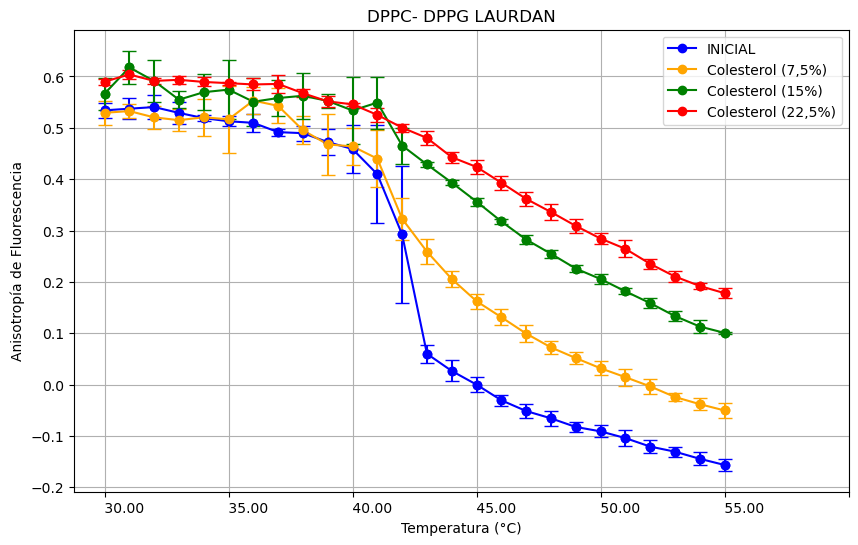

In [51]:
graficar_promedio_y_desviacion(temperatures_promedio,Promedio_Lauc, Desviacion_Lauc, Promedio_Lauc7, Desviacion_Lauc7, Promedio_Lauc15, Desviacion_Lauc15, Promedio_Lauc22, Desviacion_Lauc22)

In [53]:
def graficar_derivadas(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x,y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    plt.plot(T[:-1], der_promedio, label='INICIAL')
    plt.plot(T[:-1], der_p, label='Colesterol(7,5%)')
    plt.plot(T[:-1], der_p15, label='Colesterol(15%)')
    plt.plot(T[:-1], der_p22, label='Colesterol(22,5%)')


    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Derivada de Anisotropía')
    plt.title('DPPC- DPPG LAURDAN')
    plt.xticks(range(30, 55, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()
    

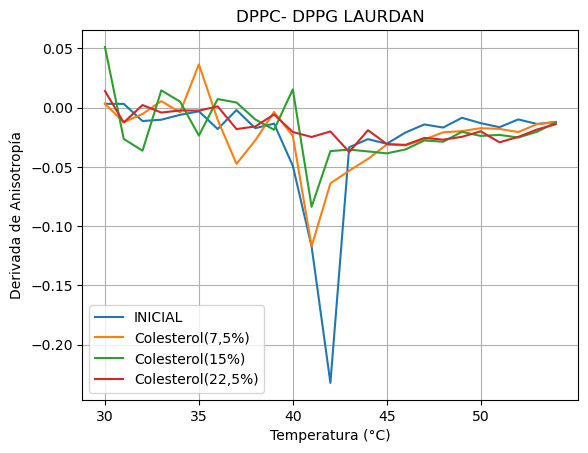

In [54]:
graficar_derivadas(temperatures_promedio, Promedio_Lauc, Promedio_Lauc7,Promedio_Lauc15,Promedio_Lauc22)

In [55]:
def encontrar_temperatura_minimac(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x, y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-13):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    T_min = np.argmin(der_promedio)
    T_min = T[T_min]

    T_min7l = np.argmin(der_p)
    T_min7l = T[T_min7l]
    
    T_min15l = np.argmin(der_p15)
    T_min15l = T[T_min15l]
    
    T_min22l = np.argmin(der_p22)
    T_min22l = T[T_min22l]

    return T_min, T_min7l, T_min15l, T_min22l

In [56]:
T_min, T_min7l, T_m15, T_m22 = encontrar_temperatura_minimac(temperatures_promedio, Promedio_Lauc, Promedio_Lauc7,Promedio_Lauc15,Promedio_Lauc22)

In [57]:
T_min, T_min7l, T_m15, T_m22

(42.0, 41.0, 41.0, 41.0)

In [58]:
def Cargar_Archivos_DPH(archivo):
    # Nombre del archivo a cargar
    nombre_archivo = archivo
    
    # Lista de nombres de columnas
    columnas = [
    "Temperature",
    "Sample",
    "Iteration",
    "GPolarization",
    "Anisotropy",
    "TotalIntensity",
    "I_VV",
    "I_VH",
    "I_HV",
    "I_HH",
    "GFactor",
    "PolarizationStdError",
    "AnisotropyStdError",
    "TotalIntensityStdError",
    "I_VVStdError",
    "I_VHStdError",
    "I_HVStdError",
    "I_HHStdError",
    "GFactorStdError",
    "RealTime",
    "RealTemperature"]
    
    # Cargar el archivo CSV
    DPH = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows=2, decimal=',')
    
    # Devolver el DataFrame cargado
    return DPH

In [59]:
DPHc = Cargar_Archivos_DPH('DPH.csv')
DPHc
DPHc7 = Cargar_Archivos_DPH('DPHc7.csv')
DPHc7
DPHc15 = Cargar_Archivos_DPH('DPHc15.csv')
DPHc15
DPHc22 = Cargar_Archivos_DPH('DPHc22.csv')
DPHc22

,Temperature,Sample,Iteration,GPolarization,Anisotropy,TotalIntensity,I_VV,I_VH,I_HV,I_HH,...,PolarizationStdError,AnisotropyStdError,TotalIntensityStdError,I_VVStdError,I_VHStdError,I_HVStdError,I_HHStdError,GFactorStdError,RealTime,RealTemperature
0,30.00,Reference,1,0.35759045,0.27065483,108222.77,55601.600,38678.400,32141.600,47250.400,...,0.026974827,0.020554767,2908.5346,1718.0537,1109.5192,880.72798,963.04056,0.023230494,7995.0246,30.020000
1,30.00,Sample2,1,0.35133907,0.26529562,95856.291,48905.600,34510.400,32141.600,47250.400,...,0.031478241,0.023742546,2817.6373,1874.7653,1000.6966,880.72798,963.04056,0.023230494,7997.9420,30.020000
2,31.00,Sample,1,0.35752593,0.27059939,104633.36,53753.600,37398.400,32141.600,47250.400,...,0.026362419,0.020429950,3102.7619,1394.2000,1587.4373,880.72798,963.04056,0.023230494,8148.7536,30.993300
3,31.00,Reference,1,0.35948511,0.27228410,102991.11,53025.600,36726.400,32141.600,47250.400,...,0.018597764,0.014511748,2233.6068,906.74902,823.49931,880.72798,963.04056,0.023230494,8151.1969,30.993300
4,31.00,Sample2,1,0.34779413,0.26226782,94599.822,48073.600,34198.400,32141.600,47250.400,...,0.024220221,0.018609345,2517.7361,1199.0989,1133.1419,880.72798,963.04056,0.023230494,8153.9897,30.993300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,54.00,Reference,1,0.25303805,0.18423121,91674.276,41817.600,36646.400,32141.600,47250.400,...,0.019350399,0.014255557,2032.0830,844.91262,528.27602,880.72798,963.04056,0.023230494,10711.209,54.010000
73,54.00,Sample2,1,0.24298180,0.17626420,83385.163,37593.600,33658.400,32141.600,47250.400,...,0.023128689,0.017058281,2373.6358,765.64454,1185.7682,880.72798,963.04056,0.023230494,10714.219,54.010000
74,55.00,Sample,1,0.21385411,0.15351250,106110.29,46229.600,44014.400,32141.600,47250.400,...,0.023269516,0.016849157,2856.7991,1133.6196,1206.5274,880.72798,963.04056,0.023230494,10819.123,55.010000
75,55.00,Reference,1,0.25044155,0.18216856,86023.314,39121.600,34474.400,32141.600,47250.400,...,0.019754142,0.014546662,1965.4715,793.23361,600.91930,880.72798,963.04056,0.023230494,10821.552,55.006600


In [60]:
Promedio_DPHc, Desviacion_DPHc,temperatures_promedio = calcular_promedio_y_desviacion(DPHc)
Promedio_DPHc7, Desviacion_DPHc7,temperatures_promedio = calcular_promedio_y_desviacion(DPHc7)
Promedio_DPHc15, Desviacion_DPHc15,temperatures_promedio = calcular_promedio_y_desviacion3(DPHc15)
Promedio_DPHc22, Desviacion_DPHc22,temperatures_promedio = calcular_promedio_y_desviacion3(DPHc22)

In [62]:
def graficar_promedio_y_desviacion_DPH(T_P, D_P, DES, D_P7, DES_7,D_P15, DES_15, D_P22, DES_22):
    plt.figure(figsize=(10, 6))  
    
    plt.errorbar(T_P, D_P, yerr=DES, fmt='o', capsize=5, color='blue')
    plt.errorbar(T_P, D_P7, yerr=DES_7, fmt='o', capsize=5, color='orange')
    plt.errorbar(T_P, D_P15, yerr=DES_15, fmt='o', capsize=5, color='green')
    plt.errorbar(T_P, D_P22, yerr=DES_22, fmt='o', capsize=5, color='red')
        
    plt.plot(T_P, D_P, marker='o', label='INICIAL', color='blue')
    plt.plot(T_P, D_P7, marker='o', label='Colesterol (7,5%)', color= 'orange')
    plt.plot(T_P, D_P15, marker='o', label='Colesterol (15%)', color='green')
    plt.plot(T_P, D_P22, marker='o', label='Colesterol (22,5%)',color = 'red')

    
    
    plt.xlabel('Temperatura')
    plt.ylabel('Anisotropía de Fluorescencia')
    plt.title('DPPC- DPPG DPH')
    plt.xticks(range(0, 35, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

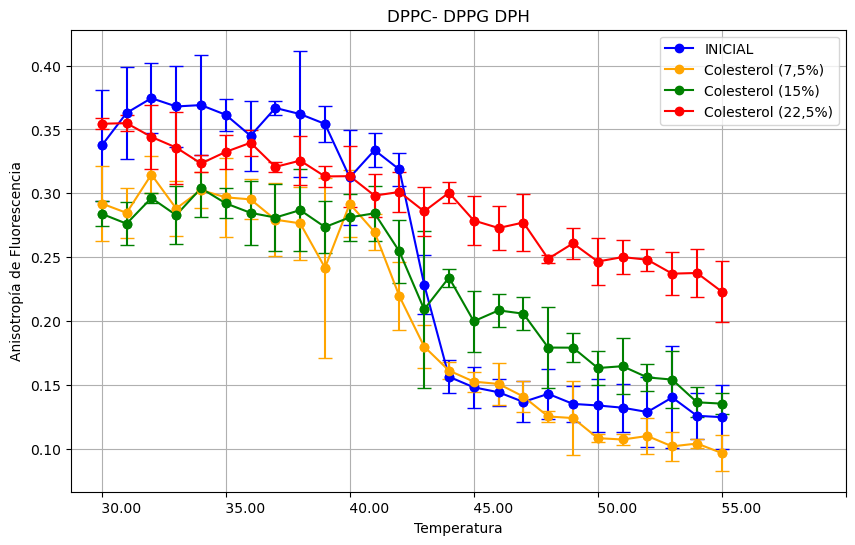

In [63]:
graficar_promedio_y_desviacion_DPH(temperatures_promedio,Promedio_DPHc, Desviacion_DPHc, Promedio_DPHc7, Desviacion_DPHc7,Promedio_DPHc15, Desviacion_DPHc15,Promedio_DPHc22, Desviacion_DPHc22)

In [65]:
def graficar_derivadas(temperatures_promedio, Promedio_DPH, Promedio_DPH7, Promedio_DPH15,Promedio_DPH22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x,y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_DPH)
    der_p = derivada(T, Promedio_DPH7)
    der_p15 = derivada(T, Promedio_DPH15)
    der_p22 = derivada(T, Promedio_DPH22)

    
    plt.plot(T[:-1], der_promedio, label='INICIAL')
    plt.plot(T[:-1], der_p, label='Colesterol(7,5%)')
    plt.plot(T[:-1], der_p15, label='Colesterol(15%)')
    plt.plot(T[:-1], der_p22, label='Colesterol(22,5%)')


    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Derivada de Anisotropía')
    plt.title('DPPC- DPPG DPH')
    plt.xticks(range(30, 55, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

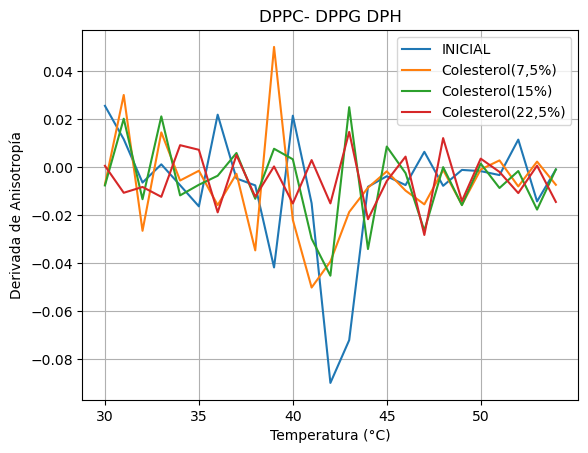

In [66]:
graficar_derivadas(temperatures_promedio, Promedio_DPHc, Promedio_DPHc7,Promedio_DPHc15,Promedio_DPHc22)

In [96]:
def encontrar_temperatura_minimacc(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x, y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-11):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    T_min = np.argmin(der_promedio)
    T_min = T[T_min]

    T_min7l = np.argmin(der_p)
    T_min7l = T[T_min7l]
    
    T_min15l = np.argmin(der_p15)
    T_min15l = T[T_min15l]
    
    T_min22l = np.argmin(der_p22)
    T_min22l = T[T_min22l]

    return T_min, T_min7l, T_min15l, T_min22l

In [97]:
T_min, T_min7l, T_m15, T_m22 = encontrar_temperatura_minimacc(temperatures_promedio, Promedio_DPHc, Promedio_DPHc7,Promedio_DPHc15,Promedio_DPHc22)

In [98]:
T_min, T_min7l, T_m15, T_m22

(42.0, 41.0, 42.0, 44.0)